In [ ]:
## Exploring Holoviews!

In [1]:
import holoviews as hv
hv.notebook_extension()
import numpy as np

In [2]:
hv.Element(None, group='Value', label='Label')

b':Element'

In [4]:
parrot = hv.RGB.load_image('../BES_analysis_data/EMPCAuptodate_weights_just_missing_valuesPCAComp. 0 (euUndermineIdentity__Strongly agree).png', array=True)
print("%s with shape %s" % (type(parrot),parrot.shape))

<class 'numpy.ndarray'> with shape (393, 793, 4)


b':RGB   [x,y]   (R,G,B,A)'
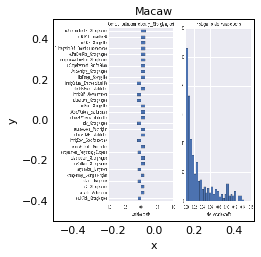

In [5]:
rgb_parrot = hv.RGB(parrot, label='Macaw')
rgb_parrot

In [6]:
rgb_parrot.data is parrot

True

b':Image   [x,y]   (z)'
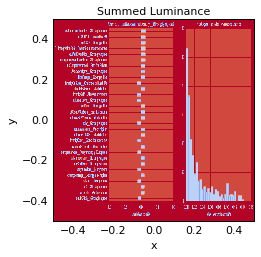

In [7]:
%%opts Image style(cmap='coolwarm')
luminance = hv.Image(parrot.sum(axis=2), label='Summed Luminance')
luminance

b':Image   [x,y]   (z)'
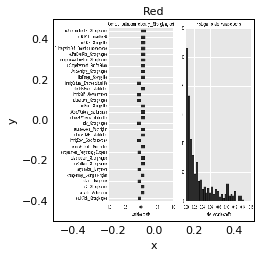

In [8]:
%opts Image style(cmap='gray')
red = hv.Image(parrot[:,:,0], label='Red')
red

:Layout
   .Image.Red   :Image   [x,y]   (z)
   .Image.Green :Image   [x,y]   (G)
   .Image.Blue  :Image   [x,y]   (B)
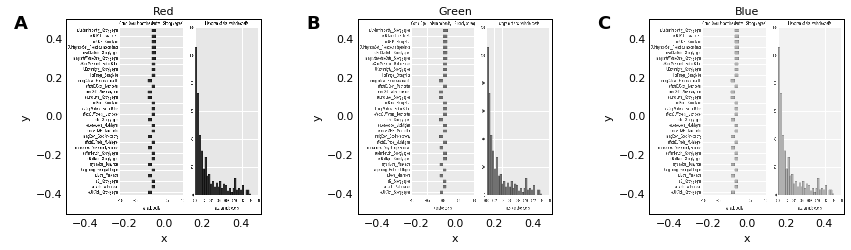

In [9]:
channels = red + rgb_parrot[:,:,'G'].relabel('Green') + rgb_parrot[:,:,'B'].relabel('Blue')
channels

In [10]:
print(channels)

:Layout
   .Image.Red   :Image   [x,y]   (z)
   .Image.Green :Image   [x,y]   (G)
   .Image.Blue  :Image   [x,y]   (B)


b':Image   [x,y]   (B)'
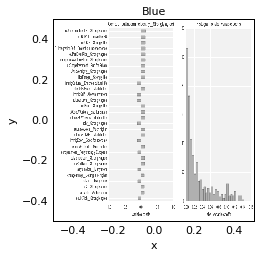

In [11]:
channels.Image.Blue

In [12]:
chans = (hv.Image(parrot[:,:,0], group='RedChannel', label='Macaw')
         + hv.Image(parrot[:,:,1], group='Channel', label='Green') 
         + hv.Image(parrot[:,:,2], group='Channel',  label='Blue'))

:Layout
   .Green :Image   [x,y]   (z)
   .Blue  :Image   [x,y]   (z)


:Layout
   .Green :Image   [x,y]   (z)
   .Blue  :Image   [x,y]   (z)
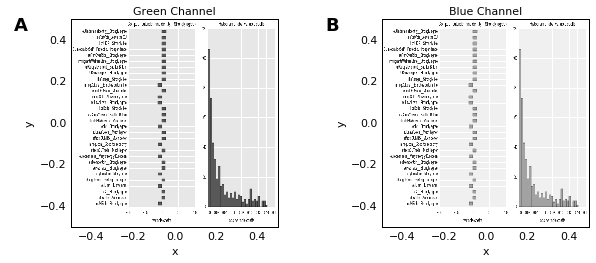

In [13]:
print(chans.Channel)
chans.Channel

:Layout
   .Macaw :Image   [x,y]   (z)
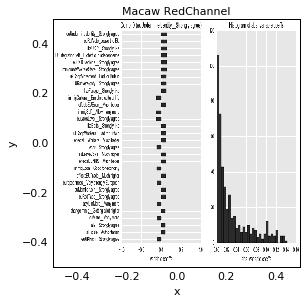

In [14]:
chans.RedChannel

In [15]:
chans.RedChannel.OriginalData.StoredForSafeKeeping = rgb_parrot

In [16]:
print(chans)

:Layout
   .RedChannel.Macaw                             :Image   [x,y]   (z)
   .Channel.Green                                :Image   [x,y]   (z)
   .Channel.Blue                                 :Image   [x,y]   (z)
   .RedChannel.OriginalData.StoredForSafeKeeping :RGB   [x,y]   (R,G,B,A)


:Layout
   .RedChannel.Macaw                             :Image   [x,y]   (z)
   .Channel.Green                                :Image   [x,y]   (z)
   .Channel.Blue                                 :Image   [x,y]   (z)
   .RedChannel.OriginalData.StoredForSafeKeeping :RGB   [x,y]   (R,G,B,A)
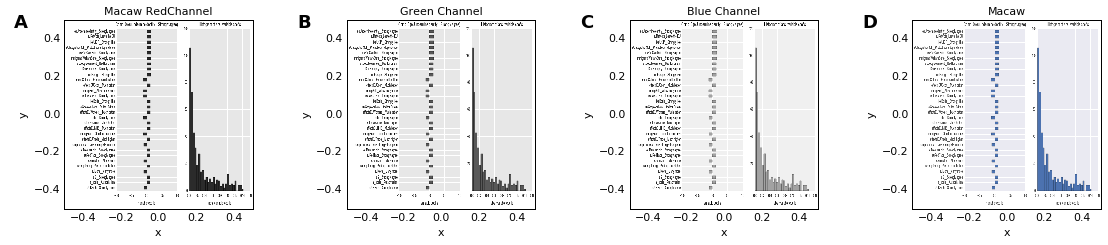

In [17]:
chans

In [18]:
chans.Channel.Blue[0.0,0.0]

0.94901961

In [19]:
chans.Channel.Blue = chans.Channel.Blue.clone(vdims=["Luminance"])
print(chans.Channel.Blue)

b':Image   [x,y]   (Luminance)'


In [20]:
print(rgb_parrot)
print(rgb_parrot[0,0])
print(rgb_parrot[0,0][0])

b':RGB   [x,y]   (R,G,B,A)'
b':Dataset   (R,G,B,A)'
b':Dataset   (R,G,B,A)'


:Overlay
   .RGB.Macaw :RGB   [x,y]   (R,G,B,A)
   .Arrow.I   :Arrow   [x,y]
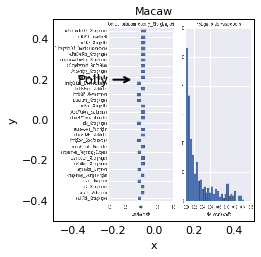

In [21]:
extents = (-0.5, -0.5, 0.5, 0.5) # Image spatial extents
o = rgb_parrot * hv.Arrow(-0.1,0.2, 'Polly', '>', extents=extents)
o

:Layout
   .Overlay.Macaw :Overlay
      .RGB.Macaw :RGB   [x,y]   (R,G,B,A)
      .Arrow.I   :Arrow   [x,y]
   .RGB.Macaw     :RGB   [x,y]   (R,G,B,A)
   .Arrow.I       :Arrow   [x,y]
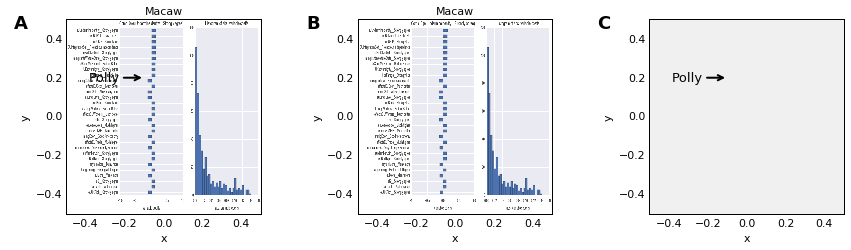

In [22]:
o + o.RGB.Macaw + o.Arrow.I

In [23]:
from holoviews.operation import contours

:Overlay
   .RedChannel.Macaw :Image   [x,y]   (z)
   .Level.Macaw      :NdOverlay   [Levels]
      :Contours   [x,y]   (z)
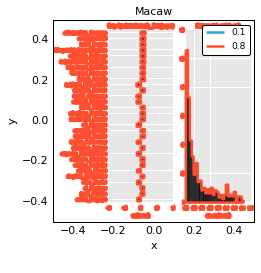

In [24]:
contours(chans.RedChannel.Macaw, levels=[0.10,0.80])

:Layout
   .Overlay.Macaw :HoloMap   [Levels]
      :Overlay
         .RedChannel.Macaw :Image   [x,y]   (z)
         .Red.Macaw        :NdOverlay   [Levels]
            :Contours   [x,y]   (z)
   .Overlay.Green :HoloMap   [Levels]
      :Overlay
         .Channel.Green :Image   [x,y]   (z)
         .Green.Green   :NdOverlay   [Levels]
            :Contours   [x,y]   (z)
   .Overlay.Blue  :HoloMap   [Levels]
      :Overlay
         .Channel.Blue :Image   [x,y]   (Luminance)
         .Blue.Blue    :NdOverlay   [Levels]
            :Contours   [x,y]   (Luminance)
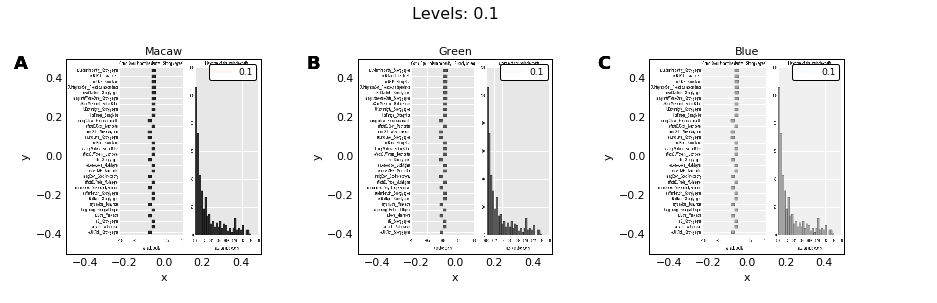
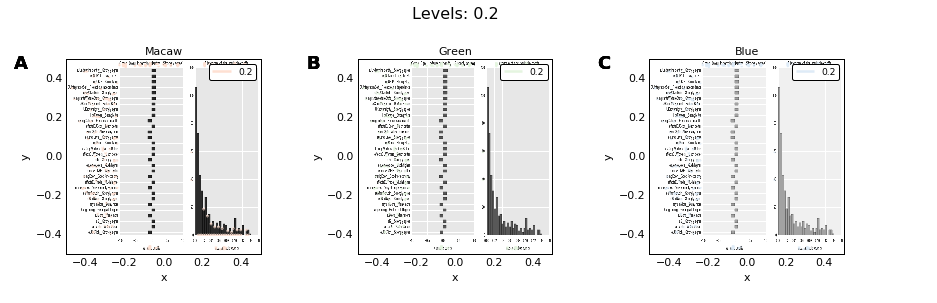
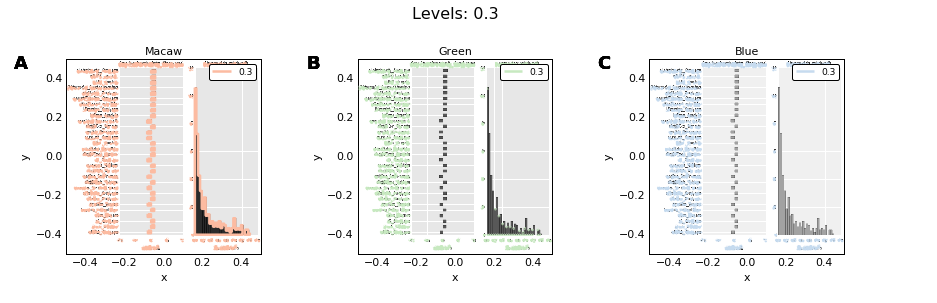
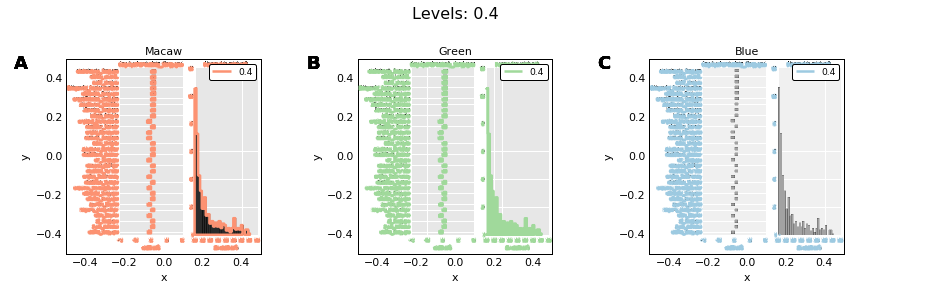
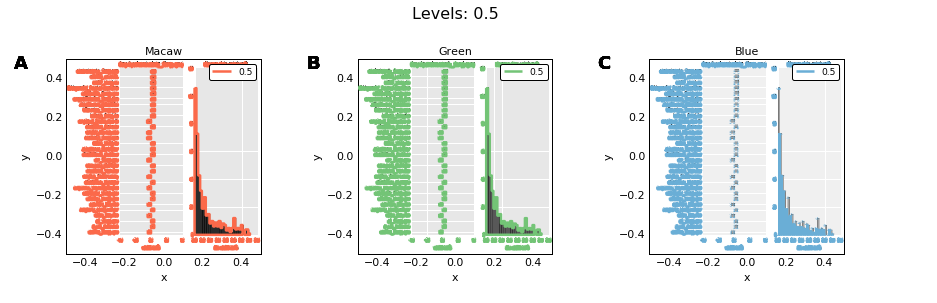
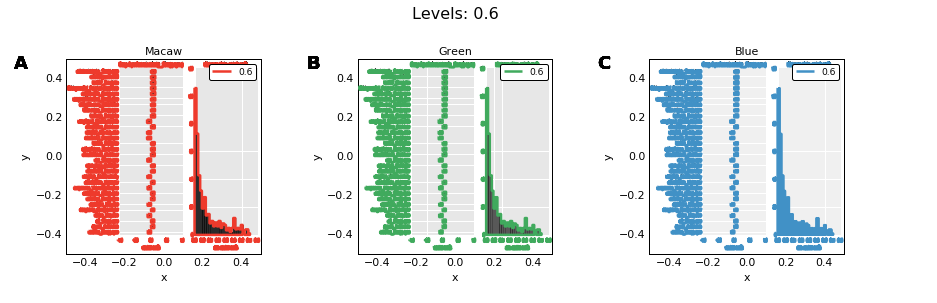
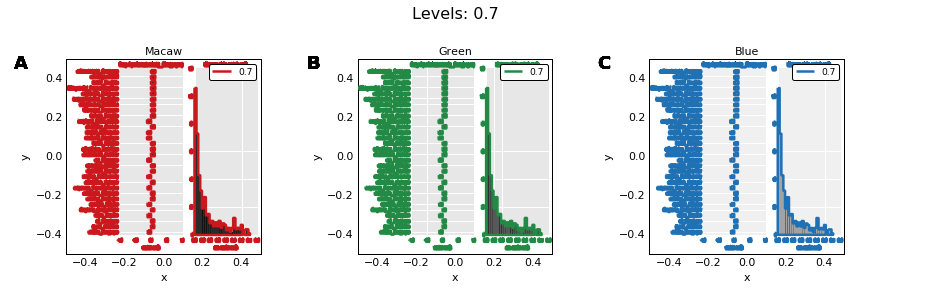
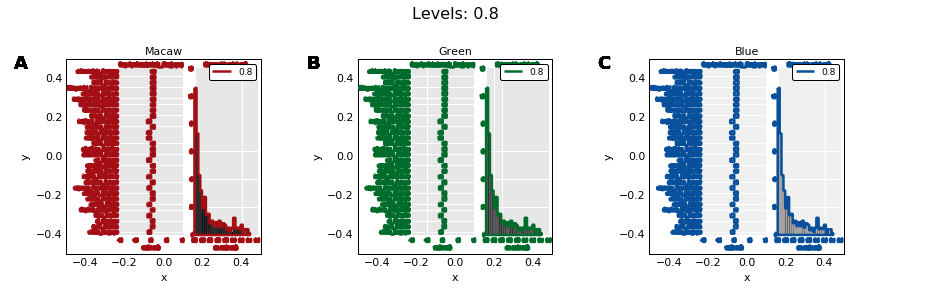
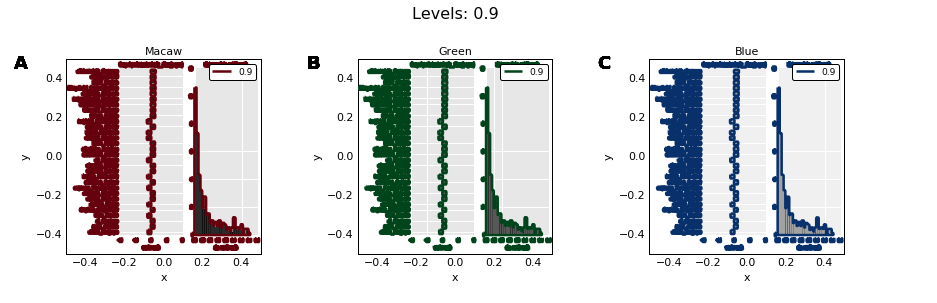

In [25]:
%%opts Contours.Red (color=Palette('Reds')) Contours.Green (color=Palette('Greens')) Contours.Blue (color=Palette('Blues'))
data = {lvl:(contours(chans.RedChannel.Macaw, levels=[lvl], group='Red') +\
             contours(chans.Channel.Green, levels=[lvl], group='Green') +\
             contours(chans.Channel.Blue, levels=[lvl], group='Blue'))
        for lvl in np.linspace(0.1,0.9,9)}
levels = hv.HoloMap(data, kdims=['Levels']).collate()
levels